In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Directories
train_dir = r'E:\Study\Project\NPL(Gastric cancer)\Split\train'
validation_dir = r'E:\Study\Project\NPL(Gastric cancer)\Split\validation'
test_dir = r'E:\Study\Project\NPL(Gastric cancer)\Split\test'


In [3]:
# Image Data Generator
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2, rotation_range=20)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['normal', 'abnormal'])

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['normal', 'abnormal'])

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    classes=['normal', 'abnormal'])


Found 704 images belonging to 2 classes.
Found 152 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


In [4]:
# Load DenseNet121 Model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)




29084464/29084464 [==============================] - 681s 23us/step


Epoch 1/10



22/22 [==============================] - 192s 6s/step - loss: 0.6910 - accuracy: 0.7656 - val_loss: 37.7574 - val_accuracy: 0.5000
Epoch 2/10
22/22 [==============================] - 124s 6s/step - loss: 0.3115 - accuracy: 0.8764 - val_loss: 8.7789 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 117s 5s/step - loss: 0.2883 - accuracy: 0.8693 - val_loss: 0.7491 - val_accuracy: 0.7171
Epoch 4/10
22/22 [==============================] - 135s 6s/step - loss: 0.2177 - accuracy: 0.9062 - val_loss: 0.7086 - val_accuracy: 0.7303
Epoch 5/10
22/22 [==============================] - 149s 7s/step - loss: 0.2102 - accuracy: 0.9190 - val_loss: 1.0576 - val_accuracy: 0.6250
Epoch 6/10
22/22 [==============================] - 137s 6s/step - loss: 0.1888 - accuracy: 0.9347 - val_loss: 2.8347 - val_accuracy: 0.5263
Epoch 7/10
22/22 [==============================] - 126s 5s/step - loss: 0.1605 - accuracy: 0.9361 - val_loss: 3.2807 - val_accuracy: 0.6316
Epoch 8/10
22/22 [=====

In [5]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


5/5 [==============================] - 6s 1s/step - loss: 5.0063 - accuracy: 0.5658
Test accuracy: 0.5657894611358643


In [6]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_true = test_generator.classes

# Calculate Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


5/5 [==============================] - 10s 1s/step
Accuracy: 0.5657894736842105
Precision: 0.5352112676056338
Recall: 1.0
F1 Score: 0.6972477064220184


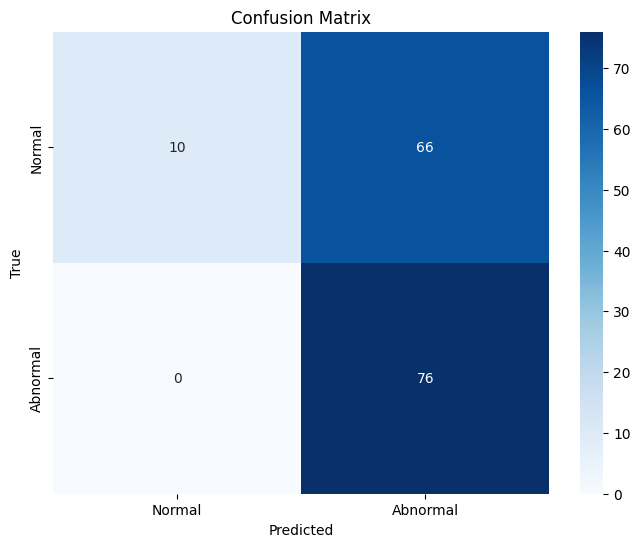

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


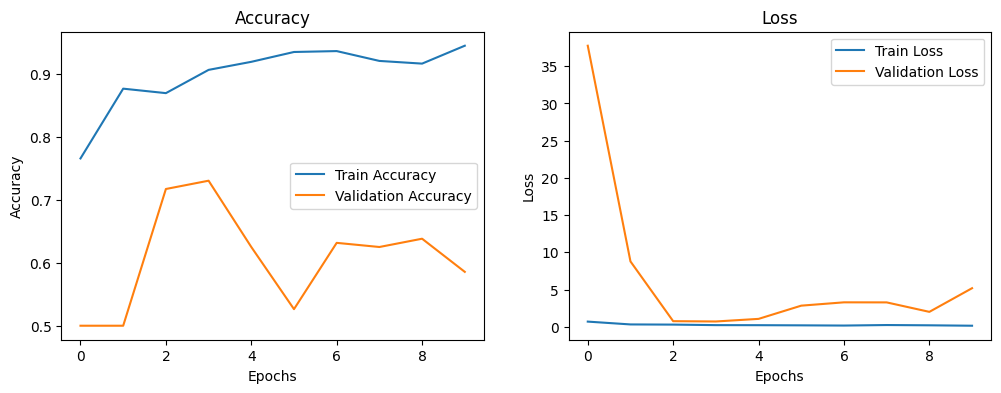

In [8]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()
